<a href="https://colab.research.google.com/github/alfredtreball/CatProject/blob/main/Proyecto_Contador_de_Personas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

"""
La línea siguiente imprime información sobre las GPUs NVIDIA disponibles en el sistema.
"""

!nvidia-smi

Thu Jan 25 16:05:30 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:

"""
Se importa el módulo torch para trabajar con PyTorch, una biblioteca de aprendizaje automático de código abierto.
El comando '!nvcc --version' obtiene la versión del compilador de NVIDIA CUDA (nvcc).
Se crea una variable TORCH_VERSION que contiene las dos primeras partes (separadas por puntos) de la versión de PyTorch.
Se crea una variable CUDA_VERSION que contiene la parte de la versión de CUDA (si existe) de la versión completa de PyTorch.
Se imprime la versión de PyTorch y, si está disponible, la versión de CUDA.
"""
import torch
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
torch:  2.1 ; cuda:  cu121


In [3]:
"""
Se importa el módulo os, que proporciona funciones para interactuar con el sistema operativo.
Se asigna el directorio de trabajo actual del proceso a la variable HOME utilizando la función os.getcwd().
Se imprime el valor de la variable HOME, que representa el directorio de trabajo actual del proceso.
"""
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
"""
Se cambia el directorio de trabajo actual al valor almacenado en la variable HOME utilizando el comando de magic %cd de Jupyter Notebook.
Se clona el repositorio de GitHub 'ultralytics/yolov5' en el directorio actual utilizando el comando de shell git clone.
Se cambia el directorio de trabajo actual al subdirectorio 'yolov5' dentro del directorio especificado por la variable HOME utilizando el comando de magic %cd.
Se instalan los requisitos del proyecto 'yolov5' utilizando pip, donde los requisitos se especifican en el archivo requirements.txt en el directorio actual.
Se importa la clase display del módulo IPython, que proporciona funcionalidades relacionadas con la visualización y la salida en un entorno interactivo.
Se llama al método clear_output() de la clase display para limpiar la salida actual en la celda de Jupyter Notebook. Esto es útil para limpiar la salida si hay demasiada información o para mejorar la legibilidad del notebook.
"""
%cd {HOME}
!git clone https://github.com/ultralytics/yolov5

%cd {HOME}/yolov5
!pip install -r requirements.txt

from IPython import display
display.clear_output()

In [5]:
"""
Se instala la versión 0.2.0 de la biblioteca supervision utilizando pip.
Se importa la clase display del módulo IPython, que proporciona funcionalidades relacionadas con la visualización y la salida en un entorno interactivo.
Se llama al método clear_output() de la clase display para limpiar la salida actual en la celda de Jupyter Notebook. Esto es útil para limpiar la salida si hay demasiada información o para mejorar la legibilidad del notebook.
Se importa la biblioteca supervision utilizando el alias sv.
Se imprime la versión de la biblioteca supervision que se ha importado.
"""
!pip install supervision==0.2.0

from IPython import display
display.clear_output()

import supervision as sv
print("supervision", sv.__version__)

supervision 0.2.0


In [6]:

"""
Se cambia el directorio de trabajo actual al valor almacenado en la variable HOME utilizando el comando de magic %cd de Jupyter Notebook.
Se descarga un archivo de video llamado 'market-square.mp4' utilizando el comando wget. El archivo se descarga de Google Drive y se utiliza un token de confirmación para asegurar la descarga. Se utilizan cookies temporales para mantener la sesión durante la descarga. Finalmente, se eliminan las cookies temporales después de la descarga.
"""

%cd {HOME}
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1vVrEVMxucHgqGd7vAa501ASojbeGPhIr' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1vVrEVMxucHgqGd7vAa501ASojbeGPhIr" -O market-square.mp4 && rm -rf /tmp/cookies.txt

/content
--2024-01-25 16:49:53--  https://docs.google.com/uc?export=download&confirm=&id=1vVrEVMxucHgqGd7vAa501ASojbeGPhIr
Resolving docs.google.com (docs.google.com)... 209.85.147.138, 209.85.147.100, 209.85.147.113, ...
Connecting to docs.google.com (docs.google.com)|209.85.147.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1vVrEVMxucHgqGd7vAa501ASojbeGPhIr&export=download [following]
--2024-01-25 16:49:53--  https://drive.usercontent.google.com/download?id=1vVrEVMxucHgqGd7vAa501ASojbeGPhIr&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.192.132, 2607:f8b0:4001:c0e::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.192.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21302928 (20M) [video/mp4]
Saving to: ‘market-square.mp4’

market-square.mp4   100%[===================>]  20.32M  --.-K

In [7]:
"""
Se crea una variable llamada MARKET_SQUARE_VIDEO_PATH que contiene la ruta al archivo de video 'market-square.mp4'.
La ruta se construye concatenando el valor de la variable HOME con el nombre del archivo de video.
"""
MARKET_SQUARE_VIDEO_PATH = f"{HOME}/market-square.mp4"

In [8]:
"""
Se importa el módulo torch.
Se carga el modelo YOLOv5x6 preentrenado utilizando la función torch.hub.load(). El modelo se carga desde el repositorio 'ultralytics/yolov5' utilizando la clave 'yolov5x6'. Esto descarga y carga automáticamente el modelo preentrenado desde el repositorio de GitHub.
"""
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5x6')

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-1-25 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 270M/270M [00:02<00:00, 124MB/s] 

Fusing layers... 
YOLOv5x6 summary: 574 layers, 140730220 parameters, 0 gradients, 209.6 GFLOPs
Adding AutoShape... 

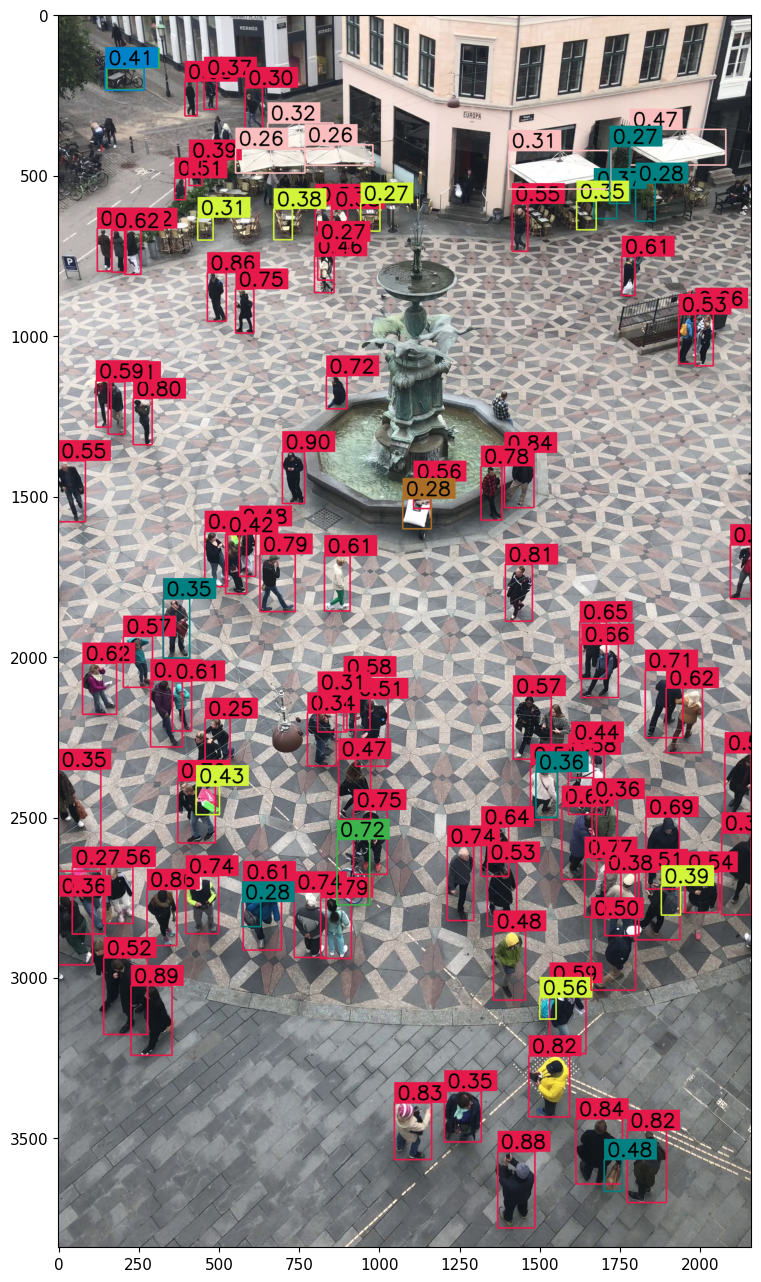

In [10]:
"""
Se importa el módulo supervision y se utiliza el alias sv para abreviar su nombre.
"""
import supervision as sv

"""
Se crea un generador de fotogramas de video a partir del archivo de video ubicado en la ruta especificada por MARKET_SQUARE_VIDEO_PATH.
"""
generator = sv.get_video_frames_generator(MARKET_SQUARE_VIDEO_PATH)

"""
Se crea un iterador a partir del generador de fotogramas de video para iterar a través de los fotogramas.
"""
iterator = iter(generator)

"""
Se obtiene el siguiente fotograma del iterador creado en el paso anterior.
"""
frame = next(iterator)

"""
Se utiliza el modelo preentrenado (model) para realizar una detección de objetos en el fotograma frame, con un tamaño de imagen de entrada de 1280 píxeles.
"""
results = model(frame, size=1280)

"""
Se convierten los resultados de la detección de objetos (results) del formato de salida del modelo YOLOv5 al formato de detecciones utilizado por la biblioteca supervision.
"""
detections = sv.Detections.from_yolov5(results)

"""
Se crea un objeto BoxAnnotator de supervision con el grosor del cuadro de contorno, el grosor del texto y la escala de texto especificados.
"""
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)

"""
Se añaden anotaciones de detección a la imagen frame utilizando el objeto BoxAnnotator creado anteriormente y las detecciones obtenidas del modelo.
"""
frame = box_annotator.annotate(scene=frame, detections=detections)

"""
Se habilita el modo inline para mostrar gráficos en el notebook de Jupyter.
"""
%matplotlib inline

"""
Se muestra el fotograma con las anotaciones de detección en el notebook de Jupyter con un tamaño de figura de 16x16 pulgadas.
"""
sv.show_frame_in_notebook(frame, (16, 16))



Tenemos muchas detecciones excesivas en la primera prueba. En la segunda prueba se eliminan todas aquellas que no pertenezcan a la clase de persona. Al mismo tiempo , podemos rechazar todas las detecciones que no superen una confianza de 0.5.

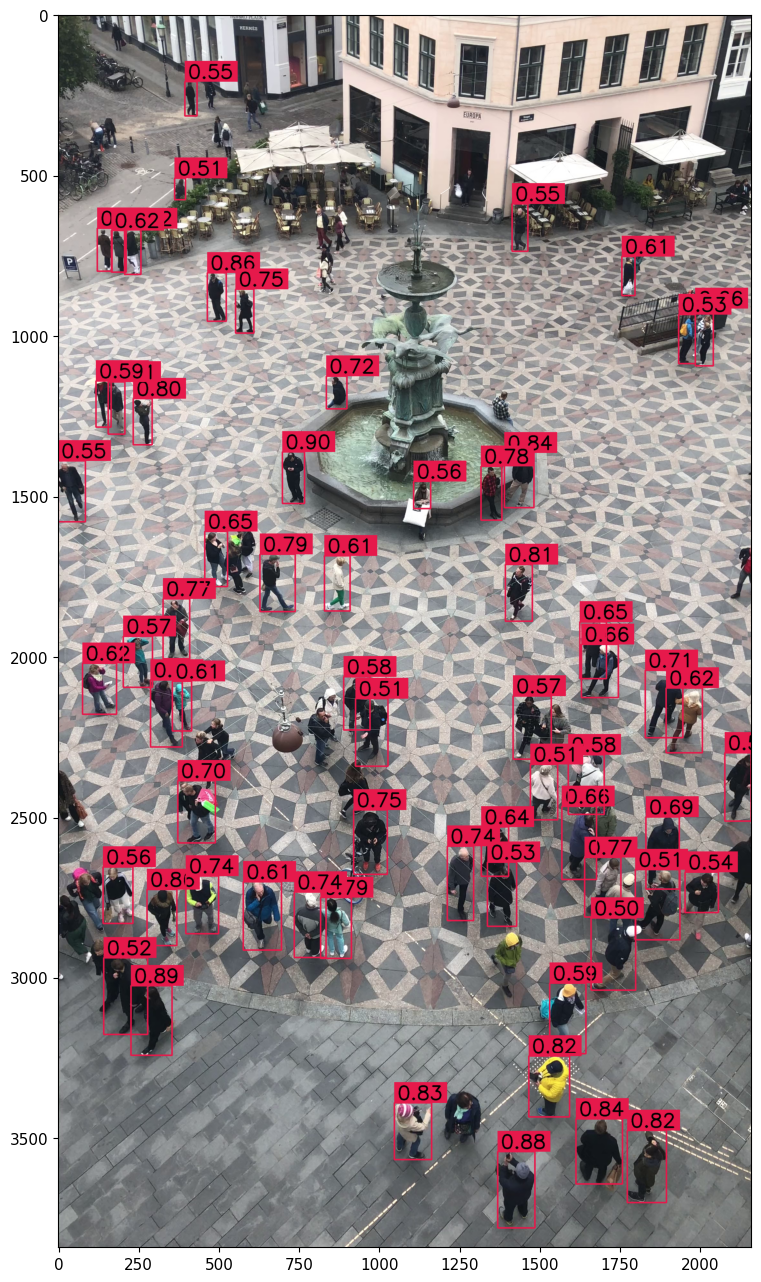

In [16]:
"""
Se importa el módulo supervision y se utiliza el alias sv para abreviar su nombre.
"""
import supervision as sv

"""
Se crea un generador de fotogramas de video a partir del archivo de video ubicado en la ruta especificada por MARKET_SQUARE_VIDEO_PATH.
"""
generator = sv.get_video_frames_generator(MARKET_SQUARE_VIDEO_PATH)

"""
Se crea un iterador a partir del generador de fotogramas de video para iterar a través de los fotogramas.
"""
iterator = iter(generator)

"""
Se obtiene el siguiente fotograma del iterador creado en el paso anterior.
"""
frame = next(iterator)

"""
Se utiliza el modelo preentrenado (model) para realizar una detección de objetos en el fotograma frame, con un tamaño de imagen de entrada de 1280 píxeles.
"""
results = model(frame, size=1280)

"""
Se convierten los resultados de la detección de objetos (results) del formato de salida del modelo YOLOv5 al formato de detecciones utilizado por la biblioteca supervision.
"""
detections = sv.Detections.from_yolov5(results)

"""
Se filtran las detecciones para seleccionar aquellas que corresponden a la clase de interés (clase 0) y tienen una confianza mayor que 0.5.
"""
detections = detections[(detections.class_id == 0) & (detections.confidence > 0.5)]

"""
Se crea un objeto BoxAnnotator de supervision con el grosor del cuadro de contorno, el grosor del texto y la escala de texto especificados.
"""
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)

"""
Se añaden anotaciones de detección a la imagen frame utilizando el objeto BoxAnnotator creado anteriormente y las detecciones obtenidas del modelo.
"""
frame = box_annotator.annotate(scene=frame, detections=detections)

"""
Se habilita el modo inline para mostrar gráficos en el notebook de Jupyter.
"""
%matplotlib inline

"""
Se muestra el fotograma con las anotaciones de detección en el notebook de Jupyter con un tamaño de figura de 16x16 pulgadas.
"""
sv.show_frame_in_notebook(frame, (16, 16))


In [12]:
len(detections)

64